In [1]:
# 패키지 설치
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
user_spec = pd.read_csv('/content/gdrive/MyDrive/dataset/user_spec.csv')
loan_data = pd.read_csv('/content/gdrive/MyDrive/dataset/loan_result.csv')

In [4]:
user_spec.isnull().sum()

application_id                               0
user_id                                      0
birth_year                               12961
gender                                   12961
insert_time                                  0
credit_score                            105115
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
dtype: int64

# 1. 공통 된 결측값을 가진 85개 데이터 삭제

In [5]:
user_spec = user_spec.dropna(subset = ['income_type'])
user_spec.isnull().sum()

application_id                               0
user_id                                      0
birth_year                               12959
gender                                   12959
insert_time                                  0
credit_score                            105112
yearly_income                                5
income_type                                  0
company_enter_month                     171675
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn              587376
personal_rehabilitation_complete_yn    1203269
existing_loan_cnt                       198540
existing_loan_amt                       313752
dtype: int64

In [6]:
user_spec

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,202106.0,기타,기타가족소유,5000000.0,사업자금,NaN,NaN,NaN,NaN
1394212,1327066,151422,1955.0,1.0,2022-03-22 01:19:24,980.0,20000000.0,OTHERINCOME,NaN,기타,자가,50000000.0,생활비,NaN,NaN,1.0,NaN
1394213,1319606,173524,1983.0,1.0,2022-03-22 07:34:32,750.0,75000000.0,EARNEDINCOME,200908.0,정규직,자가,100000000.0,대환대출,NaN,NaN,8.0,200000000.0
1394214,1482466,766546,1975.0,1.0,2022-03-22 22:12:35,640.0,50000000.0,EARNEDINCOME,201705.0,정규직,자가,10000000.0,대환대출,NaN,NaN,10.0,117000000.0


# 2. Birth_year을 나이로

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


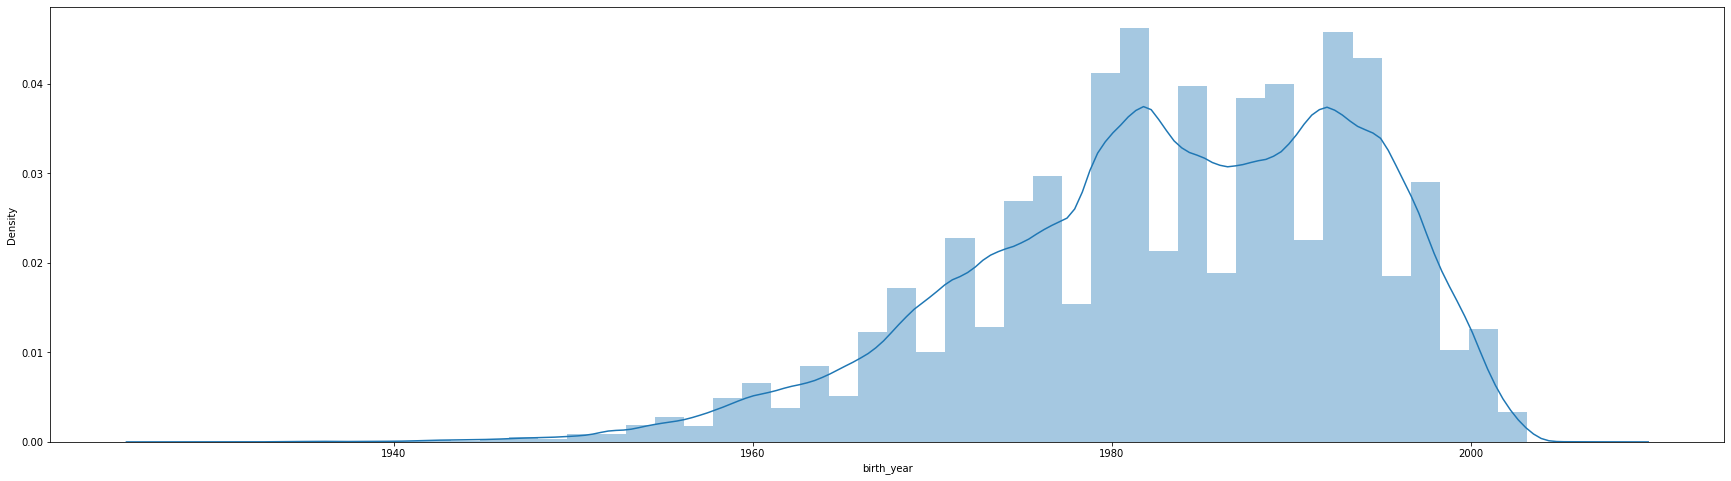

In [7]:
plt.figure(figsize=(30,8))
sns.distplot(user_spec['birth_year'])
plt.show()

In [8]:
user_spec['age'] = 2023 - user_spec['birth_year']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


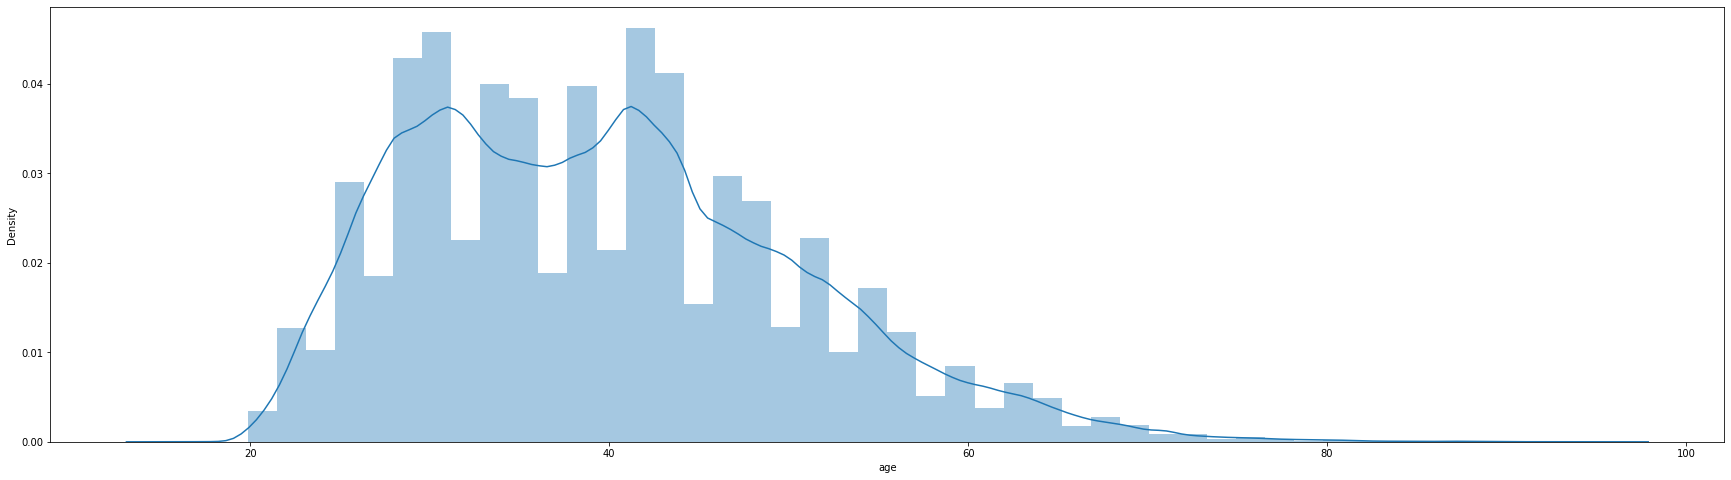

In [9]:
plt.figure(figsize=(30,8))
sns.distplot(user_spec['age'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


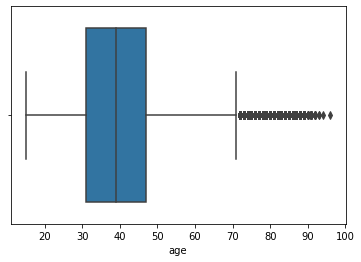

In [10]:
sns.boxplot(user_spec["age"])

In [11]:
user_spec.loc[user_spec['age'] < 20, 'reage'] = 10
user_spec.loc[(user_spec['age'] >= 20) & (user_spec['age'] <30), 'reage'] = 20
user_spec.loc[(user_spec['age'] >= 30) & (user_spec['age'] <40), 'reage'] = 30
user_spec.loc[(user_spec['age'] >= 40) & (user_spec['age'] <50), 'reage'] = 40
user_spec.loc[(user_spec['age'] >= 50) & (user_spec['age'] <60), 'reage'] = 50
user_spec.loc[(user_spec['age'] >= 60) & (user_spec['age'] <70), 'reage'] = 60
user_spec.loc[user_spec['age'] >= 70, 'reage'] = 70

In [12]:
user_spec.head(5)

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0,38.0,30.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0,55.0,50.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0,26.0,20.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0,34.0,30.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0,23.0,20.0


# 3. 대출 목적 겹치는 것 합치기

In [13]:
user_spec['purpose'].unique()

array(['기타', '대환대출', '생활비', '사업자금', '주택구입', '전월세보증금', '투자', 'LIVING',
       'SWITCHLOAN', 'ETC', 'INVEST', '자동차구입', 'BUSINESS', 'BUYCAR',
       'HOUSEDEPOSIT', 'BUYHOUSE'], dtype=object)

* 신용대출, 자동차대출, 담보대출, 전세대출

https://steemit.com/kr/@sumisum/6brzfz

In [14]:
user_spec['purpose'] = user_spec['purpose'].replace("기타", 'ETC').replace("대환대출", 'SWITCHLOAN').replace("생활비", 'LIVING').replace("사업자금", "BUSINESS").replace("주택구입", 'BUYHOUSE').replace("전월세보증금", 'HOUSEDEPOSIT').replace("투자", 'INVEST').replace("자동차구입", 'BUYCAR')

In [15]:
user_spec['purpose'].unique()

array(['ETC', 'SWITCHLOAN', 'LIVING', 'BUSINESS', 'BUYHOUSE',
       'HOUSEDEPOSIT', 'INVEST', 'BUYCAR'], dtype=object)

In [16]:
user_spec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1394131 entries, 0 to 1394215
Data columns (total 19 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   application_id                       1394131 non-null  int64  
 1   user_id                              1394131 non-null  int64  
 2   birth_year                           1381172 non-null  float64
 3   gender                               1381172 non-null  float64
 4   insert_time                          1394131 non-null  object 
 5   credit_score                         1289019 non-null  float64
 6   yearly_income                        1394126 non-null  float64
 7   income_type                          1394131 non-null  object 
 8   company_enter_month                  1222456 non-null  float64
 9   employment_type                      1394131 non-null  object 
 10  houseown_type                        1394131 non-null  object 
 11

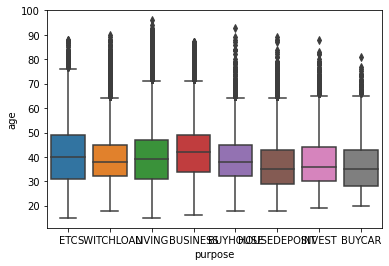

In [17]:
sns.boxplot(y= user_spec["age"], x= user_spec["purpose"])

In [18]:
user_spec.groupby(['purpose']).mean()

,application_id,user_id,birth_year,gender,credit_score,yearly_income,company_enter_month,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
purpose,,,,,,,,,,,,,,
BUSINESS,1.083056e+06,437578.086154,1980.777790,0.697858,694.270873,7.164412e+07,5.072147e+06,4.494958e+07,0.015288,0.011308,3.504064,8.042556e+07,42.222210,37.826143
BUYCAR,1.076957e+06,438989.706999,1986.214694,0.812178,684.433024,5.049731e+07,1.306264e+06,2.970332e+07,0.031042,0.021127,3.039635,6.421831e+07,36.785306,32.312750
BUYHOUSE,1.083973e+06,436362.846158,1983.697397,0.681699,819.493152,5.450197e+07,4.918962e+06,1.718995e+08,0.010926,0.007347,2.538954,8.886561e+07,39.302603,34.962895
ETC,1.079840e+06,438622.859333,1982.462834,0.671482,673.352993,4.451424e+07,5.018580e+06,4.240260e+07,0.022669,0.009895,4.010702,6.911641e+07,40.537166,36.138659
HOUSEDEPOSIT,1.087935e+06,439299.895064,1985.916276,0.621204,716.028147,4.316833e+07,5.073002e+06,7.786010e+07,0.027570,0.010152,2.772844,5.413286e+07,37.083724,32.599745
INVEST,1.092035e+06,438081.930225,1985.521632,0.862904,769.919451,5.501032e+07,4.982424e+06,6.792337e+07,0.006240,0.008980,3.651293,9.522019e+07,37.478368,33.018973
LIVING,1.084111e+06,439967.580608,1983.181228,0.673505,625.478551,4.096931e+07,5.142721e+06,2.037487e+07,0.018038,0.007151,5.001972,6.913450e+07,39.818772,35.376081
SWITCHLOAN,1.083899e+06,439263.970746,1983.720593,0.676328,640.013624,4.350789e+07,5.145603e+06,3.950921e+07,0.009272,0.005657,4.636365,7.277597e+07,39.279407,34.863491


In [19]:
user_spec.groupby(['reage']).mean()

,application_id,user_id,birth_year,gender,credit_score,yearly_income,company_enter_month,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age
reage,,,,,,,,,,,,,
10.0,1.064194e+06,455693.868421,2005.017544,0.763158,727.894737,2.371053e+07,5.469021e+06,2.783596e+08,0.101124,0.210526,1.000000,NaN,17.982456
20.0,1.084303e+06,440691.349461,1996.726845,0.710269,626.343699,2.933934e+07,5.344644e+06,1.977717e+07,0.011120,0.002367,3.824053,3.401478e+07,26.273155
30.0,1.084433e+06,440882.277204,1988.671923,0.701614,641.346381,4.047910e+07,5.117083e+06,3.138149e+07,0.014037,0.006113,4.710535,6.765369e+07,34.328077
40.0,1.081947e+06,436590.725867,1979.070624,0.650786,641.188582,4.914588e+07,5.033486e+06,3.288367e+07,0.018161,0.014178,5.144666,8.840543e+07,43.929376
50.0,1.086161e+06,441002.207551,1969.441814,0.653708,638.356915,5.745686e+07,4.963377e+06,3.586131e+07,0.020097,0.026471,5.081826,8.694078e+07,53.558186
60.0,1.086536e+06,437587.806977,1959.664978,0.603164,641.153846,4.716989e+07,5.068176e+06,3.395843e+07,0.019472,0.030141,4.901452,6.487075e+07,63.335022
70.0,1.093017e+06,451108.777550,1948.812852,0.509363,669.453841,3.590279e+07,5.805380e+06,2.202415e+07,0.010503,0.009317,4.899381,5.294928e+07,74.187148


* 연간 소득은 나이에 따라 차이가 제일 크기 때문에 나이는 연관 소득과 관련해서 채우면 좋을 것 같음

# 3. 연관 소득 결측값

In [20]:
user_spec_1 = user_spec.fillna({'yearly_income': 'NaN'})
user_spec_1[user_spec_1['yearly_income'] == 'NaN']

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
165422,1026915,861363,1995.0,1.0,2022-06-30 21:11:51,NaN,NaN,OTHERINCOME,NaN,기타,전월세,5000000.0,LIVING,0.0,0.0,NaN,NaN,28.0,20.0
233316,2045613,702899,1995.0,1.0,2022-06-30 18:37:04,520.0,NaN,FREELANCER,20220630.0,기타,전월세,5000000.0,HOUSEDEPOSIT,0.0,0.0,1.0,1000000.0,28.0,20.0
597591,391560,329226,1996.0,0.0,2022-06-30 19:27:28,590.0,NaN,OTHERINCOME,NaN,기타,전월세,20000000.0,LIVING,0.0,0.0,9.0,27000000.0,27.0,20.0
597613,341149,670502,1981.0,1.0,2022-06-30 21:32:18,930.0,NaN,OTHERINCOME,NaN,기타,기타가족소유,6000000.0,BUSINESS,0.0,0.0,1.0,3000000.0,42.0,40.0
971960,1330905,771592,2003.0,1.0,2022-06-30 18:57:05,750.0,NaN,OTHERINCOME,NaN,기타,자가,3000000.0,LIVING,0.0,0.0,1.0,3000000.0,20.0,20.0


* 연간 소득이 결측값인 것 중 OTHERINCOME	은 무직이라 판단하여 : 0
* 프리렌서는 같은 나이 대 (20대) 중 프리렌서의 연간 소득의 평균 대입 : 27482640

In [21]:
user_spec['income_type'].unique()

array(['PRIVATEBUSINESS', 'FREELANCER', 'EARNEDINCOME', 'OTHERINCOME',
       'EARNEDINCOME2', 'PRACTITIONER'], dtype=object)

* EARNEDINCOME2 는 전문직 인듯

In [22]:
grouped = user_spec.groupby(['reage', 'income_type'])['yearly_income'].mean()
grouped

reage  income_type    
10.0   EARNEDINCOME       3.240000e+08
       EARNEDINCOME2      4.500000e+07
       FREELANCER         2.000000e+07
       OTHERINCOME        4.463158e+06
20.0   EARNEDINCOME       3.147551e+07
       EARNEDINCOME2      2.519769e+07
       FREELANCER         2.748264e+07
       OTHERINCOME        1.719249e+07
       PRACTITIONER       3.120135e+07
       PRIVATEBUSINESS    5.659056e+07
30.0   EARNEDINCOME       4.046537e+07
       EARNEDINCOME2      3.353194e+07
       FREELANCER         3.944012e+07
       OTHERINCOME        2.422685e+07
       PRACTITIONER       5.007317e+07
       PRIVATEBUSINESS    6.450014e+07
40.0   EARNEDINCOME       4.907662e+07
       EARNEDINCOME2      3.888079e+07
       FREELANCER         4.040184e+07
       OTHERINCOME        3.116387e+07
       PRACTITIONER       6.533972e+07
       PRIVATEBUSINESS    7.374286e+07
50.0   EARNEDINCOME       5.668118e+07
       EARNEDINCOME2      7.146791e+07
       FREELANCER         4.606854e+07
  

In [23]:
user_spec = user_spec.fillna({'yearly_income': 0})

In [24]:
user_spec[user_spec['application_id'] == 2045613]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
233316,2045613,702899,1995.0,1.0,2022-06-30 18:37:04,520.0,0.0,FREELANCER,20220630.0,기타,전월세,5000000.0,HOUSEDEPOSIT,0.0,0.0,1.0,1000000.0,28.0,20.0


In [25]:
index = user_spec[user_spec['application_id'] == 2045613].index
index

Int64Index([233316], dtype='int64')

In [26]:
user_spec.iat[233305, 6] = 27482640

In [27]:
user_spec[user_spec['application_id'] == 2045613] 

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
233316,2045613,702899,1995.0,1.0,2022-06-30 18:37:04,520.0,27482640.0,FREELANCER,20220630.0,기타,전월세,5000000.0,HOUSEDEPOSIT,0.0,0.0,1.0,1000000.0,28.0,20.0


In [28]:
user_spec.isnull().sum()

application_id                               0
user_id                                      0
birth_year                               12959
gender                                   12959
insert_time                                  0
credit_score                            105112
yearly_income                                0
income_type                                  0
company_enter_month                     171675
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn              587376
personal_rehabilitation_complete_yn    1203269
existing_loan_cnt                       198540
existing_loan_amt                       313752
age                                      12959
reage                                    12959
dtype: int64

# 4. existing_loan_cnt 결측값

In [29]:
user_spec_2 = user_spec.fillna({'existing_loan_cnt': 'NaN'})
user_spec_2[user_spec_2['existing_loan_cnt'] == 'NaN']

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
7,1146166,588743,1992.0,0.0,2022-06-07 17:19:33,750.0,46000000.0,EARNEDINCOME,20151001.0,정규직,기타가족소유,6000000.0,LIVING,0.0,0.0,NaN,NaN,31.0,30.0
23,1237618,717213,1986.0,1.0,2022-06-07 03:26:54,530.0,51000000.0,EARNEDINCOME,20170501.0,정규직,전월세,5000000.0,LIVING,0.0,0.0,NaN,NaN,37.0,30.0
25,272600,754046,1980.0,1.0,2022-06-07 19:24:28,NaN,22000000.0,EARNEDINCOME,20090101.0,정규직,전월세,22000000.0,SWITCHLOAN,0.0,NaN,NaN,NaN,43.0,40.0
37,703129,324991,1994.0,0.0,2022-06-07 11:12:24,950.0,0.0,OTHERINCOME,NaN,기타,자가,50000000.0,ETC,0.0,NaN,NaN,NaN,29.0,20.0
48,612258,59149,1998.0,1.0,2022-06-07 07:31:21,NaN,0.0,PRIVATEBUSINESS,20220301.0,기타,전월세,1000000.0,LIVING,0.0,0.0,NaN,NaN,25.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394184,1107103,162983,1978.0,1.0,2022-03-22 12:14:17,750.0,55000000.0,EARNEDINCOME,201408.0,정규직,전월세,50000000.0,LIVING,NaN,NaN,NaN,NaN,45.0,40.0
1394203,943512,183117,1996.0,0.0,2022-03-22 16:22:21,710.0,24000000.0,EARNEDINCOME,202201.0,정규직,전월세,25000000.0,HOUSEDEPOSIT,NaN,NaN,NaN,NaN,27.0,20.0
1394204,1663661,183117,1996.0,0.0,2022-03-22 17:37:49,710.0,30000000.0,OTHERINCOME,NaN,기타,전월세,25000000.0,ETC,NaN,NaN,NaN,NaN,27.0,20.0
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,202106.0,기타,기타가족소유,5000000.0,BUSINESS,NaN,NaN,NaN,NaN,23.0,20.0


In [30]:
user_spec['existing_loan_cnt'].unique()

array([  4.,   1.,   5.,   7.,  nan,   3.,   2.,  10.,   6.,   8.,  14.,
         9.,  15.,  12.,  11.,  22.,  13.,  21.,  32.,  44.,  23.,  16.,
        17.,  18.,  25.,  70.,  20.,  24.,  76.,  50.,  27.,  35.,  48.,
        19.,  40.,  38.,  29.,  79.,  41.,  33.,  31.,  84.,  45.,  37.,
        26.,  30.,  28.,  43.,  34.,  97., 109.,  39.,  58.,  65.,  42.,
        86., 103.,  60.,  63.,  59.,  55.,  46., 102., 178.,  53.,  36.,
        51.,  54., 131.,  47.,  49., 157.,  89.,  52.,  62.,  57.,  56.,
        66.,  74., 117., 107.,  61., 125.,  69.,  96.,  77.,  75., 142.,
        85., 229.,  81., 278., 176.,  72., 128.,  73., 106.,  67.,  71.,
       169., 156.])

* 기대출 수에 0 은 존재하고 있지 않고, 198540명 정도는 처음으로 대출상품을 이용하는 고객일 가능성이 높다 생각해 existing_loan_cnt의 결측값은 0으로 채우기

In [31]:
user_spec = user_spec.fillna({'existing_loan_cnt': 0})

In [32]:
user_spec.isnull().sum()

application_id                               0
user_id                                      0
birth_year                               12959
gender                                   12959
insert_time                                  0
credit_score                            105112
yearly_income                                0
income_type                                  0
company_enter_month                     171675
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn              587376
personal_rehabilitation_complete_yn    1203269
existing_loan_cnt                            0
existing_loan_amt                       313752
age                                      12959
reage                                    12959
dtype: int64

# 5. existing_loan_amt 결측값

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


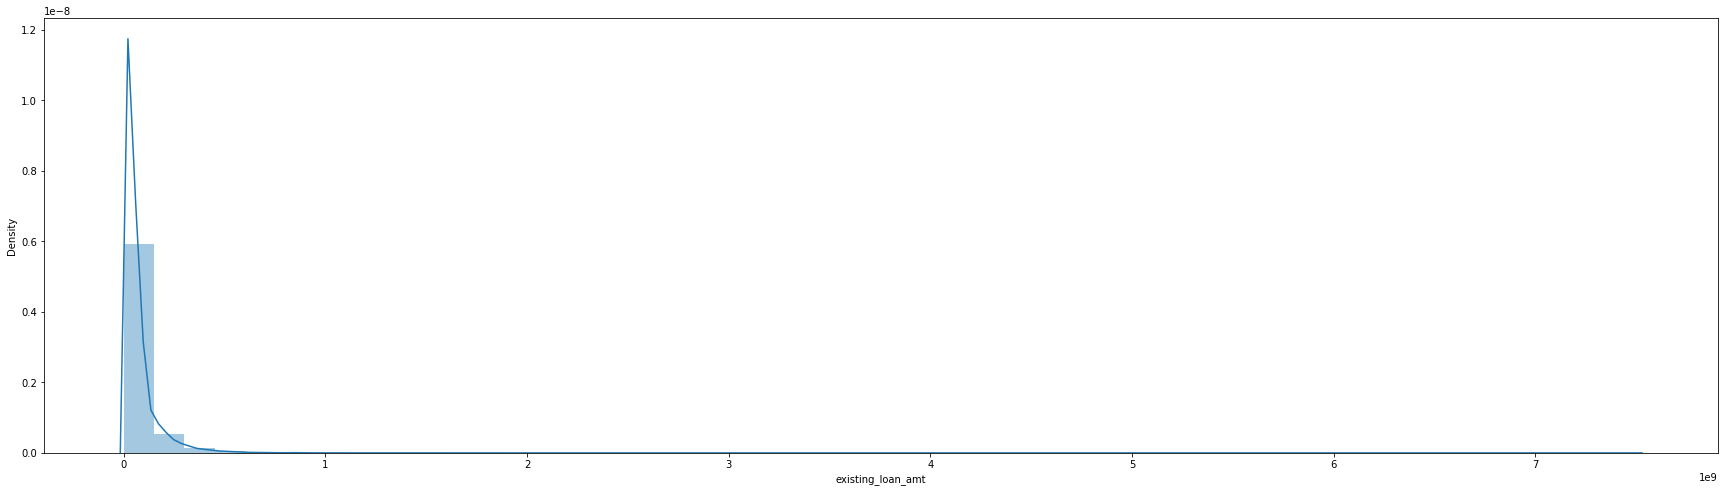

In [33]:
plt.figure(figsize=(30,8))
sns.distplot(user_spec['existing_loan_amt'])
plt.show()

* 분위수 2~3 의 평균만

* 기대출 수가 0인 부분은 0으로 채우고 나머지는.. 최빈값?

In [34]:
test = user_spec[user_spec['existing_loan_amt'] >= 1000000000]
test

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
712,1887738,32395,1975.0,1.0,2022-03-19 15:13:42,850.0,250000000.0,PRIVATEBUSINESS,200702.0,정규직,자가,30000000.0,LIVING,NaN,NaN,4.0,1.234000e+09,48.0,40.0
3139,1233080,87327,1973.0,1.0,2022-06-07 14:49:35,810.0,78000000.0,EARNEDINCOME,19960901.0,정규직,자가,50000000.0,ETC,0.0,0.0,4.0,1.068000e+09,50.0,50.0
4468,163956,529880,1985.0,1.0,2022-03-25 11:28:28,650.0,45000000.0,EARNEDINCOME,201103.0,정규직,자가,10000000.0,LIVING,NaN,NaN,6.0,1.134000e+09,38.0,30.0
6448,811182,755640,1970.0,1.0,2022-04-25 11:10:05,360.0,15000000.0,EARNEDINCOME,200909.0,정규직,자가,20000000.0,LIVING,0.0,NaN,10.0,1.196000e+09,53.0,50.0
10555,754108,510213,1973.0,1.0,2022-06-14 20:31:08,700.0,43000000.0,EARNEDINCOME,20120101.0,정규직,자가,40000000.0,LIVING,0.0,NaN,11.0,1.066000e+09,50.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355089,1086225,679240,1974.0,1.0,2022-05-20 16:49:46,NaN,150000000.0,EARNEDINCOME,200301.0,정규직,자가,60000000.0,LIVING,0.0,0.0,19.0,1.045000e+09,49.0,40.0
1379170,1297831,52341,1982.0,0.0,2022-06-22 12:16:43,650.0,60000000.0,EARNEDINCOME,20210701.0,정규직,자가,40000000.0,SWITCHLOAN,0.0,NaN,4.0,1.107000e+09,41.0,40.0
1379656,1741693,222663,1977.0,1.0,2022-04-27 13:01:22,650.0,320000000.0,EARNEDINCOME,201804.0,정규직,전월세,200000000.0,ETC,0.0,NaN,4.0,1.074000e+09,46.0,40.0
1381666,1066122,222663,1977.0,1.0,2022-06-10 20:58:14,650.0,320000000.0,PRACTITIONER,20180401.0,정규직,기타가족소유,300000000.0,LIVING,0.0,NaN,4.0,1.074000e+09,46.0,40.0


# 6. 파생변수 아이디어 살짝

* existing_loan_amt / existing_loan_cnt	 = 과거 대출 1회 당 평균 금액
* 과거 대출 1회 당 대출 금액과 desired_amount의 차이 (많냐 적냐/ 차이금액)
* 기존 대출 없었던 사람은 동일로 봄

# 7. 입사년도 연도로만 통일화

In [35]:
user_spec.loc[(user_spec['company_enter_month'] < 10000000)]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
153,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,202110.0,기타,전월세,25000000.0,SWITCHLOAN,0.0,0.0,3.0,76000000.0,44.0,40.0
154,1384503,8623,1979.0,0.0,2022-04-20 18:51:40,590.0,50000000.0,PRIVATEBUSINESS,201211.0,정규직,자가,50000000.0,BUSINESS,0.0,0.0,0.0,NaN,44.0,40.0
155,1617530,379488,1976.0,1.0,2022-04-20 10:08:40,600.0,100000000.0,PRIVATEBUSINESS,201210.0,정규직,기타가족소유,10000000.0,LIVING,NaN,NaN,1.0,14000000.0,47.0,40.0
156,1019382,186886,1979.0,1.0,2022-04-20 00:38:18,730.0,95000000.0,EARNEDINCOME,201803.0,정규직,전월세,40000000.0,SWITCHLOAN,0.0,NaN,4.0,142000000.0,44.0,40.0
157,1117343,594274,1993.0,0.0,2022-04-20 15:01:01,670.0,35000000.0,EARNEDINCOME,201901.0,정규직,전월세,13000000.0,SWITCHLOAN,0.0,NaN,3.0,36000000.0,30.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394210,316356,53701,1996.0,1.0,2022-03-22 10:01:38,730.0,60000000.0,PRIVATEBUSINESS,202105.0,정규직,전월세,15000000.0,BUSINESS,NaN,NaN,1.0,NaN,27.0,20.0
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,202106.0,기타,기타가족소유,5000000.0,BUSINESS,NaN,NaN,0.0,NaN,23.0,20.0
1394213,1319606,173524,1983.0,1.0,2022-03-22 07:34:32,750.0,75000000.0,EARNEDINCOME,200908.0,정규직,자가,100000000.0,SWITCHLOAN,NaN,NaN,8.0,200000000.0,40.0,40.0
1394214,1482466,766546,1975.0,1.0,2022-03-22 22:12:35,640.0,50000000.0,EARNEDINCOME,201705.0,정규직,자가,10000000.0,SWITCHLOAN,NaN,NaN,10.0,117000000.0,48.0,40.0


In [36]:
user_spec.loc[(user_spec['company_enter_month'] > 10000000)]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,ETC,0.0,NaN,4.0,162000000.0,38.0,30.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,SWITCHLOAN,0.0,NaN,1.0,27000000.0,55.0,50.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,LIVING,0.0,NaN,5.0,15000000.0,26.0,20.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,LIVING,0.0,NaN,7.0,344000000.0,34.0,30.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,LIVING,0.0,0.0,1.0,16000000.0,23.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394083,2154350,28718,1994.0,1.0,2022-06-21 10:51:16,590.0,40000000.0,EARNEDINCOME,20210301.0,계약직,전월세,3000000.0,LIVING,0.0,0.0,8.0,73000000.0,29.0,20.0
1394084,759813,659656,1990.0,0.0,2022-06-21 14:25:07,600.0,34000000.0,EARNEDINCOME,20211014.0,정규직,기타가족소유,1000000.0,LIVING,0.0,0.0,5.0,46000000.0,33.0,30.0
1394086,242374,293080,1983.0,1.0,2022-06-21 21:13:54,660.0,78000000.0,EARNEDINCOME,20200501.0,정규직,자가,30000000.0,LIVING,0.0,NaN,3.0,202000000.0,40.0,40.0
1394087,1356506,50945,1982.0,1.0,2022-06-21 09:07:48,560.0,34000000.0,EARNEDINCOME,20201001.0,정규직,전월세,4000000.0,LIVING,0.0,NaN,5.0,65000000.0,41.0,40.0


In [37]:
user_spec_test = user_spec.fillna({'company_enter_month': 'NaN'})

In [38]:
user_spec_0 = user_spec_test[user_spec_test['company_enter_month'] == 'NaN']

In [39]:
user_spec_1 = user_spec[user_spec['company_enter_month'] < 10000000]
user_spec_1['company_enter_month'] = (user_spec_1['company_enter_month'] / 100).round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
user_spec_2 = user_spec[user_spec['company_enter_month'] >= 10000000]
user_spec_2['company_enter_month'] = (user_spec_2['company_enter_month'] / 10000).round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
test = pd.concat([user_spec_1, user_spec_2])
test

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
153,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,2021.0,기타,전월세,25000000.0,SWITCHLOAN,0.0,0.0,3.0,76000000.0,44.0,40.0
154,1384503,8623,1979.0,0.0,2022-04-20 18:51:40,590.0,50000000.0,PRIVATEBUSINESS,2012.0,정규직,자가,50000000.0,BUSINESS,0.0,0.0,0.0,NaN,44.0,40.0
155,1617530,379488,1976.0,1.0,2022-04-20 10:08:40,600.0,100000000.0,PRIVATEBUSINESS,2012.0,정규직,기타가족소유,10000000.0,LIVING,NaN,NaN,1.0,14000000.0,47.0,40.0
156,1019382,186886,1979.0,1.0,2022-04-20 00:38:18,730.0,95000000.0,EARNEDINCOME,2018.0,정규직,전월세,40000000.0,SWITCHLOAN,0.0,NaN,4.0,142000000.0,44.0,40.0
157,1117343,594274,1993.0,0.0,2022-04-20 15:01:01,670.0,35000000.0,EARNEDINCOME,2019.0,정규직,전월세,13000000.0,SWITCHLOAN,0.0,NaN,3.0,36000000.0,30.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394083,2154350,28718,1994.0,1.0,2022-06-21 10:51:16,590.0,40000000.0,EARNEDINCOME,2021.0,계약직,전월세,3000000.0,LIVING,0.0,0.0,8.0,73000000.0,29.0,20.0
1394084,759813,659656,1990.0,0.0,2022-06-21 14:25:07,600.0,34000000.0,EARNEDINCOME,2021.0,정규직,기타가족소유,1000000.0,LIVING,0.0,0.0,5.0,46000000.0,33.0,30.0
1394086,242374,293080,1983.0,1.0,2022-06-21 21:13:54,660.0,78000000.0,EARNEDINCOME,2020.0,정규직,자가,30000000.0,LIVING,0.0,NaN,3.0,202000000.0,40.0,40.0
1394087,1356506,50945,1982.0,1.0,2022-06-21 09:07:48,560.0,34000000.0,EARNEDINCOME,2020.0,정규직,전월세,4000000.0,LIVING,0.0,NaN,5.0,65000000.0,41.0,40.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


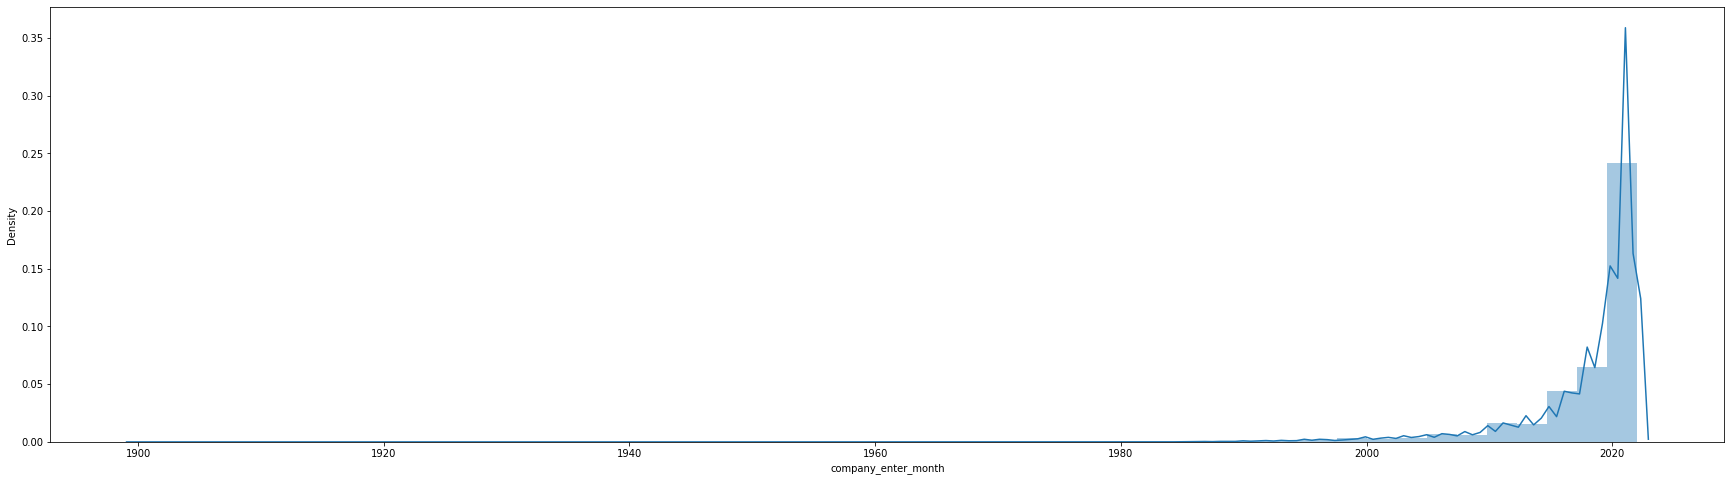

In [42]:
plt.figure(figsize=(30,8))
sns.distplot(test['company_enter_month'])
plt.show()

* 많은 사람이이 2021 쯤인걸로 봐서 가장 최근 직장 입사일 기준인 것 같음

In [43]:
user_spec = pd.concat([test, user_spec_0])
user_spec

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
153,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,2021.0,기타,전월세,25000000.0,SWITCHLOAN,0.0,0.0,3.0,76000000.0,44.0,40.0
154,1384503,8623,1979.0,0.0,2022-04-20 18:51:40,590.0,50000000.0,PRIVATEBUSINESS,2012.0,정규직,자가,50000000.0,BUSINESS,0.0,0.0,0.0,NaN,44.0,40.0
155,1617530,379488,1976.0,1.0,2022-04-20 10:08:40,600.0,100000000.0,PRIVATEBUSINESS,2012.0,정규직,기타가족소유,10000000.0,LIVING,NaN,NaN,1.0,14000000.0,47.0,40.0
156,1019382,186886,1979.0,1.0,2022-04-20 00:38:18,730.0,95000000.0,EARNEDINCOME,2018.0,정규직,전월세,40000000.0,SWITCHLOAN,0.0,NaN,4.0,142000000.0,44.0,40.0
157,1117343,594274,1993.0,0.0,2022-04-20 15:01:01,670.0,35000000.0,EARNEDINCOME,2019.0,정규직,전월세,13000000.0,SWITCHLOAN,0.0,NaN,3.0,36000000.0,30.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394139,889505,564698,1973.0,1.0,2022-03-22 10:04:18,560.0,35000000.0,OTHERINCOME,NaN,기타,기타가족소유,3000000.0,LIVING,NaN,NaN,5.0,13000000.0,50.0,50.0
1394174,1108793,374260,1994.0,1.0,2022-03-22 03:59:57,520.0,20000000.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,SWITCHLOAN,NaN,NaN,0.0,NaN,29.0,20.0
1394194,834323,145747,1958.0,1.0,2022-03-22 18:10:29,760.0,32000000.0,OTHERINCOME,NaN,기타,자가,100000000.0,SWITCHLOAN,NaN,NaN,2.0,31000000.0,65.0,60.0
1394204,1663661,183117,1996.0,0.0,2022-03-22 17:37:49,710.0,30000000.0,OTHERINCOME,NaN,기타,전월세,25000000.0,ETC,NaN,NaN,0.0,NaN,27.0,20.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


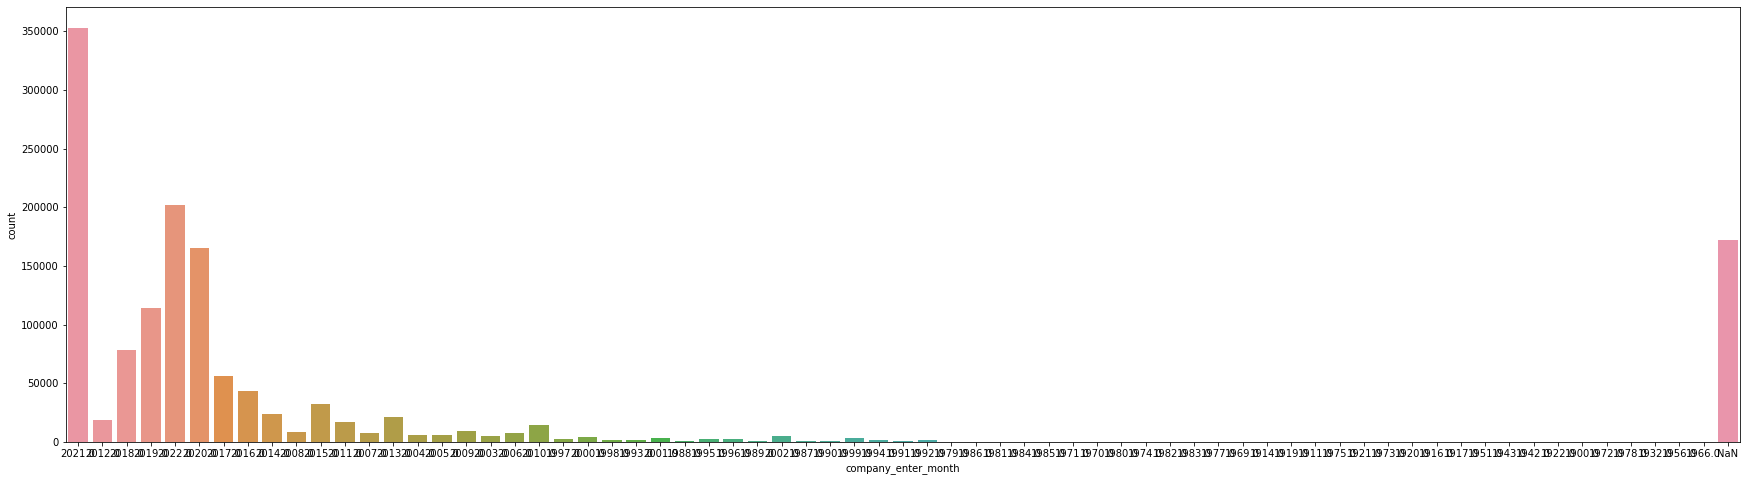

In [44]:
plt.figure(figsize=(30,8))
sns.countplot(user_spec['company_enter_month'])
plt.show()

In [45]:
user_spec[user_spec['company_enter_month'] == 'NaN']

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
6,1614045,860410,1976.0,1.0,2022-06-07 11:29:05,590.0,45000000.0,OTHERINCOME,NaN,기타,자가,15000000.0,SWITCHLOAN,0.0,NaN,1.0,20000000.0,47.0,40.0
26,696416,648540,1965.0,1.0,2022-06-07 11:38:46,750.0,30000000.0,OTHERINCOME,NaN,기타,전월세,20000000.0,LIVING,0.0,NaN,1.0,NaN,58.0,50.0
37,703129,324991,1994.0,0.0,2022-06-07 11:12:24,950.0,0.0,OTHERINCOME,NaN,기타,자가,50000000.0,ETC,0.0,NaN,0.0,NaN,29.0,20.0
39,246114,470525,1983.0,1.0,2022-06-07 22:00:53,NaN,45000000.0,OTHERINCOME,NaN,기타,전월세,30000000.0,BUSINESS,0.0,NaN,1.0,NaN,40.0,40.0
45,531087,260981,1976.0,1.0,2022-06-07 11:34:55,680.0,42000000.0,OTHERINCOME,NaN,기타,자가,6000000.0,LIVING,0.0,NaN,15.0,42000000.0,47.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394139,889505,564698,1973.0,1.0,2022-03-22 10:04:18,560.0,35000000.0,OTHERINCOME,NaN,기타,기타가족소유,3000000.0,LIVING,NaN,NaN,5.0,13000000.0,50.0,50.0
1394174,1108793,374260,1994.0,1.0,2022-03-22 03:59:57,520.0,20000000.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,SWITCHLOAN,NaN,NaN,0.0,NaN,29.0,20.0
1394194,834323,145747,1958.0,1.0,2022-03-22 18:10:29,760.0,32000000.0,OTHERINCOME,NaN,기타,자가,100000000.0,SWITCHLOAN,NaN,NaN,2.0,31000000.0,65.0,60.0
1394204,1663661,183117,1996.0,0.0,2022-03-22 17:37:49,710.0,30000000.0,OTHERINCOME,NaN,기타,전월세,25000000.0,ETC,NaN,NaN,0.0,NaN,27.0,20.0


* 19살 이하

In [46]:
a = user_spec[user_spec['age']<=19]
a

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
94319,1451310,636531,2004.0,0.0,2022-05-14 00:15:08,750.0,2000000.0,EARNEDINCOME,2021.0,정규직,전월세,0.0,LIVING,0.0,NaN,1.0,NaN,19.0,10.0
182244,2049432,141632,2004.0,1.0,2022-05-17 23:18:53,NaN,14000000.0,FREELANCER,2022.0,기타,기타가족소유,3000000.0,ETC,1.0,1.0,1.0,NaN,19.0,10.0
377474,459489,43128,2005.0,1.0,2022-03-14 00:29:47,NaN,40000000.0,EARNEDINCOME2,2021.0,기타,전월세,2000000.0,BUSINESS,NaN,NaN,0.0,NaN,18.0,10.0
426583,1403690,806320,2007.0,1.0,2022-05-28 11:18:30,NaN,40000000.0,FREELANCER,2022.0,기타,기타가족소유,200000000.0,BUSINESS,0.0,NaN,1.0,NaN,16.0,10.0
479147,1898508,446404,2006.0,1.0,2022-04-18 01:16:52,NaN,80000000.0,EARNEDINCOME2,2022.0,계약직,기타가족소유,6000000.0,LIVING,NaN,NaN,1.0,NaN,17.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275895,2142945,425345,2005.0,1.0,2022-06-23 01:32:10,NaN,1000000.0,OTHERINCOME,NaN,기타,자가,5000000.0,LIVING,0.0,NaN,1.0,NaN,18.0,10.0
1325718,1374844,680641,2006.0,1.0,2022-05-12 10:09:56,NaN,0.0,OTHERINCOME,NaN,기타,기타가족소유,0.0,LIVING,0.0,0.0,0.0,NaN,17.0,10.0
1343326,1953877,595174,2005.0,0.0,2022-05-01 15:31:49,NaN,0.0,OTHERINCOME,NaN,기타,기타가족소유,0.0,LIVING,0.0,NaN,1.0,NaN,18.0,10.0
1348307,1931824,511507,2004.0,0.0,2022-06-26 09:55:25,NaN,0.0,OTHERINCOME,NaN,기타,전월세,100000000.0,HOUSEDEPOSIT,0.0,0.0,0.0,NaN,19.0,10.0


In [47]:
# 데이터 불러오기
loan_result = pd.read_csv('/content/gdrive/MyDrive/dataset/loan_result.csv')
loan_result

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN
...,...,...,...,...,...,...,...
13527358,1428218,2022-06-03 12:01:58,62,200,3000000.0,14.8,NaN
13527359,1428218,2022-06-03 12:01:49,2,7,40000000.0,11.8,NaN
13527360,1428218,2022-06-03 12:01:48,32,257,15000000.0,7.2,NaN
13527361,1428218,2022-06-03 12:01:48,33,110,44000000.0,13.5,NaN


In [48]:
merge1 = pd.merge(loan_result, a,
                    how = 'left',
                    on = 'application_id')
merge1

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13527358,1428218,2022-06-03 12:01:58,62,200,3000000.0,14.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13527359,1428218,2022-06-03 12:01:49,2,7,40000000.0,11.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13527360,1428218,2022-06-03 12:01:48,32,257,15000000.0,7.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13527361,1428218,2022-06-03 12:01:48,33,110,44000000.0,13.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
b = merge1[merge1['age'].notnull()]
b

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage


* 19살 이하가 대출한 사람이 없음 확인

In [50]:
test.groupby(['reage'])['company_enter_month'].mean()

reage
10.0    2020.631579
20.0    2020.694502
30.0    2019.139347
40.0    2017.019879
50.0    2015.655749
60.0    2016.701267
70.0    2016.859967
Name: company_enter_month, dtype: float64

* 나이대 별로 회사 입사 년도 평균 넣기(반올림)

# 8. 회사입사 연도, 태어난 연도 차이로 근속연수 파생변수 만들기

# 9. 성별

In [51]:
user_spec["gender"].value_counts()

1.0    934267
0.0    446905
Name: gender, dtype: int64

In [52]:
user_spec.groupby(['gender']).mean()

,application_id,user_id,birth_year,credit_score,yearly_income,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
gender,,,,,,,,,,,,
0.0,1.084339e+06,438033.147826,1982.233855,634.601276,3.749489e+07,2.651393e+07,0.016309,0.006640,4.031450,5.733741e+07,40.766145,36.327631
1.0,1.083929e+06,440267.879030,1983.787821,640.031380,4.634174e+07,3.211161e+07,0.015334,0.007253,4.107391,7.717286e+07,39.212179,34.782594


* 비율대로 무작위 넣는게 최선일 것 같은 느낌

# 남은 것

* personal_rehabilitation_yn              587376
* personal_rehabilitation_complete_yn    1203269
* credit_score                            105112


# 9/20 personal_rehabilitation_yn

In [53]:
user_spec

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
153,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,2021.0,기타,전월세,25000000.0,SWITCHLOAN,0.0,0.0,3.0,76000000.0,44.0,40.0
154,1384503,8623,1979.0,0.0,2022-04-20 18:51:40,590.0,50000000.0,PRIVATEBUSINESS,2012.0,정규직,자가,50000000.0,BUSINESS,0.0,0.0,0.0,NaN,44.0,40.0
155,1617530,379488,1976.0,1.0,2022-04-20 10:08:40,600.0,100000000.0,PRIVATEBUSINESS,2012.0,정규직,기타가족소유,10000000.0,LIVING,NaN,NaN,1.0,14000000.0,47.0,40.0
156,1019382,186886,1979.0,1.0,2022-04-20 00:38:18,730.0,95000000.0,EARNEDINCOME,2018.0,정규직,전월세,40000000.0,SWITCHLOAN,0.0,NaN,4.0,142000000.0,44.0,40.0
157,1117343,594274,1993.0,0.0,2022-04-20 15:01:01,670.0,35000000.0,EARNEDINCOME,2019.0,정규직,전월세,13000000.0,SWITCHLOAN,0.0,NaN,3.0,36000000.0,30.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394139,889505,564698,1973.0,1.0,2022-03-22 10:04:18,560.0,35000000.0,OTHERINCOME,NaN,기타,기타가족소유,3000000.0,LIVING,NaN,NaN,5.0,13000000.0,50.0,50.0
1394174,1108793,374260,1994.0,1.0,2022-03-22 03:59:57,520.0,20000000.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,SWITCHLOAN,NaN,NaN,0.0,NaN,29.0,20.0
1394194,834323,145747,1958.0,1.0,2022-03-22 18:10:29,760.0,32000000.0,OTHERINCOME,NaN,기타,자가,100000000.0,SWITCHLOAN,NaN,NaN,2.0,31000000.0,65.0,60.0
1394204,1663661,183117,1996.0,0.0,2022-03-22 17:37:49,710.0,30000000.0,OTHERINCOME,NaN,기타,전월세,25000000.0,ETC,NaN,NaN,0.0,NaN,27.0,20.0


In [54]:
user_spec['personal_rehabilitation_yn'].unique()

array([ 0., nan,  1.])

In [55]:
user_spec['personal_rehabilitation_yn'].value_counts()

0.0    794046
1.0     12709
Name: personal_rehabilitation_yn, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


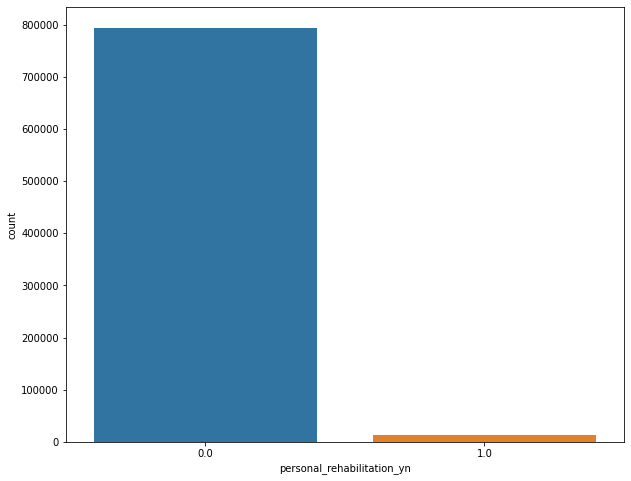

In [56]:
plt.figure(figsize=(10,8))
sns.countplot(user_spec['personal_rehabilitation_yn'])
plt.show()

In [57]:
user_spec.groupby(['personal_rehabilitation_yn']).count()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
personal_rehabilitation_yn,,,,,,,,,,,,,,,,,,
0.0,794046,794046,786127,786127,794046,745802,794046,794046,794046,794046,794046,794046,794046,178153,794046,634908,786127,786127
1.0,12709,12709,12501,12501,12709,11340,12709,12709,12709,12709,12709,12709,12709,12709,12709,8537,12501,12501


* 794046 : 12709

In [58]:
user_spec[user_spec['personal_rehabilitation_yn'] == 0] 

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
153,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,2021.0,기타,전월세,25000000.0,SWITCHLOAN,0.0,0.0,3.0,76000000.0,44.0,40.0
154,1384503,8623,1979.0,0.0,2022-04-20 18:51:40,590.0,50000000.0,PRIVATEBUSINESS,2012.0,정규직,자가,50000000.0,BUSINESS,0.0,0.0,0.0,NaN,44.0,40.0
156,1019382,186886,1979.0,1.0,2022-04-20 00:38:18,730.0,95000000.0,EARNEDINCOME,2018.0,정규직,전월세,40000000.0,SWITCHLOAN,0.0,NaN,4.0,142000000.0,44.0,40.0
157,1117343,594274,1993.0,0.0,2022-04-20 15:01:01,670.0,35000000.0,EARNEDINCOME,2019.0,정규직,전월세,13000000.0,SWITCHLOAN,0.0,NaN,3.0,36000000.0,30.0,30.0
158,1355252,180240,1995.0,0.0,2022-04-20 15:21:40,930.0,31000000.0,EARNEDINCOME,2022.0,정규직,전월세,50000000.0,BUYHOUSE,0.0,0.0,0.0,NaN,28.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394007,1636169,671866,1935.0,0.0,2022-06-21 08:26:07,590.0,6000000.0,OTHERINCOME,NaN,기타,자가,3000000.0,LIVING,0.0,NaN,2.0,25000000.0,88.0,70.0
1394011,275848,294140,1976.0,0.0,2022-06-21 09:38:27,570.0,36000000.0,OTHERINCOME,NaN,기타,전월세,3000000.0,LIVING,0.0,NaN,6.0,63000000.0,47.0,40.0
1394042,1167939,737948,1996.0,0.0,2022-06-21 23:53:29,820.0,0.0,OTHERINCOME,NaN,기타,기타가족소유,3000000.0,LIVING,0.0,0.0,1.0,NaN,27.0,20.0
1394072,1088308,821383,1984.0,0.0,2022-06-21 19:40:15,760.0,20000000.0,OTHERINCOME,NaN,기타,전월세,25000000.0,SWITCHLOAN,0.0,NaN,3.0,44000000.0,39.0,30.0


### 정의서에 나온 설명 그대로 쓴 것
* 0: 개인회생자X, 1: 개인회생자O
* 0: (개인회생자인 경우) 납입중, 1: 납입완료

* 개인 회생자 O -> 개인회생자 납입 완료 여부 O/X : 1 -> 0/1
* 개인 회생자 X -> 개인회생자 납입 이미 끝남/ 개인회생자 된 적 없음: 0 -> NaN (이렇게 되어야하는데 개인회상자 아닌데 개인회생 납입중인 사람으로 표현된 사람들은 뭐지? 오류인듯)


In [59]:
user_spec[user_spec['personal_rehabilitation_yn'] == 1] 

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
170,1640338,298318,1976.0,1.0,2022-04-20 08:16:04,100.0,50000000.0,EARNEDINCOME,2014.0,정규직,전월세,5000000.0,LIVING,1.0,0.0,1.0,25000000.0,47.0,40.0
224,256442,614734,1976.0,1.0,2022-04-20 16:13:06,540.0,40000000.0,EARNEDINCOME,2019.0,정규직,전월세,15000000.0,LIVING,1.0,0.0,2.0,64000000.0,47.0,40.0
839,1317819,153202,1986.0,1.0,2022-04-24 13:15:11,250.0,30000000.0,PRIVATEBUSINESS,2020.0,계약직,기타가족소유,1000000.0,LIVING,1.0,0.0,5.0,37000000.0,37.0,30.0
940,1508331,490410,1976.0,1.0,2022-05-31 10:27:56,600.0,35000000.0,EARNEDINCOME,2022.0,정규직,기타가족소유,3000000.0,LIVING,1.0,0.0,2.0,9000000.0,47.0,40.0
953,1283327,115321,1990.0,1.0,2022-05-31 12:24:13,580.0,55000000.0,EARNEDINCOME,2016.0,정규직,기타가족소유,5000000.0,LIVING,1.0,1.0,3.0,67000000.0,33.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391808,1150217,669120,1971.0,0.0,2022-06-23 11:06:33,550.0,20000000.0,OTHERINCOME,NaN,기타,기타가족소유,4000000.0,LIVING,1.0,0.0,2.0,28000000.0,52.0,50.0
1392073,272266,717275,1982.0,0.0,2022-05-25 12:13:07,100.0,50000000.0,OTHERINCOME,NaN,기타,전월세,3000000.0,LIVING,1.0,0.0,1.0,4000000.0,41.0,40.0
1392539,1204274,516963,1996.0,0.0,2022-05-12 18:57:17,NaN,0.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,LIVING,1.0,0.0,0.0,NaN,27.0,20.0
1392834,903515,355781,1971.0,0.0,2022-06-14 19:02:54,550.0,18000000.0,OTHERINCOME,NaN,기타,기타가족소유,4000000.0,LIVING,1.0,0.0,6.0,28000000.0,52.0,50.0


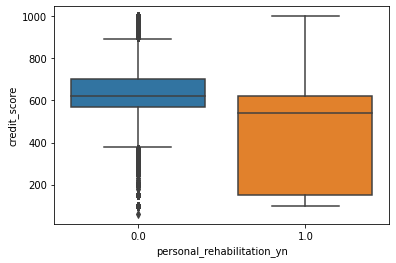

In [60]:
sns.boxplot(y= user_spec["credit_score"], x=user_spec["personal_rehabilitation_yn"])

* 신용점수가 400이하인 것은 개인회생여부 1
* 나머지 결측값(신용점수가 결측값이라 못 채우는 것도 포함)은 0: 1 =  794046 : 12709 비율로 랜덤 --> 400이하인 것은 1로 만든걸 감안해서 0쪽에 살짝 더 비율을 줘도 될 것 같아 깔끔하게 0:1 = 80:12 로

신용점수가 과연 개인회생여부에 가장 큰 의미를 부여하는 변수인가...?

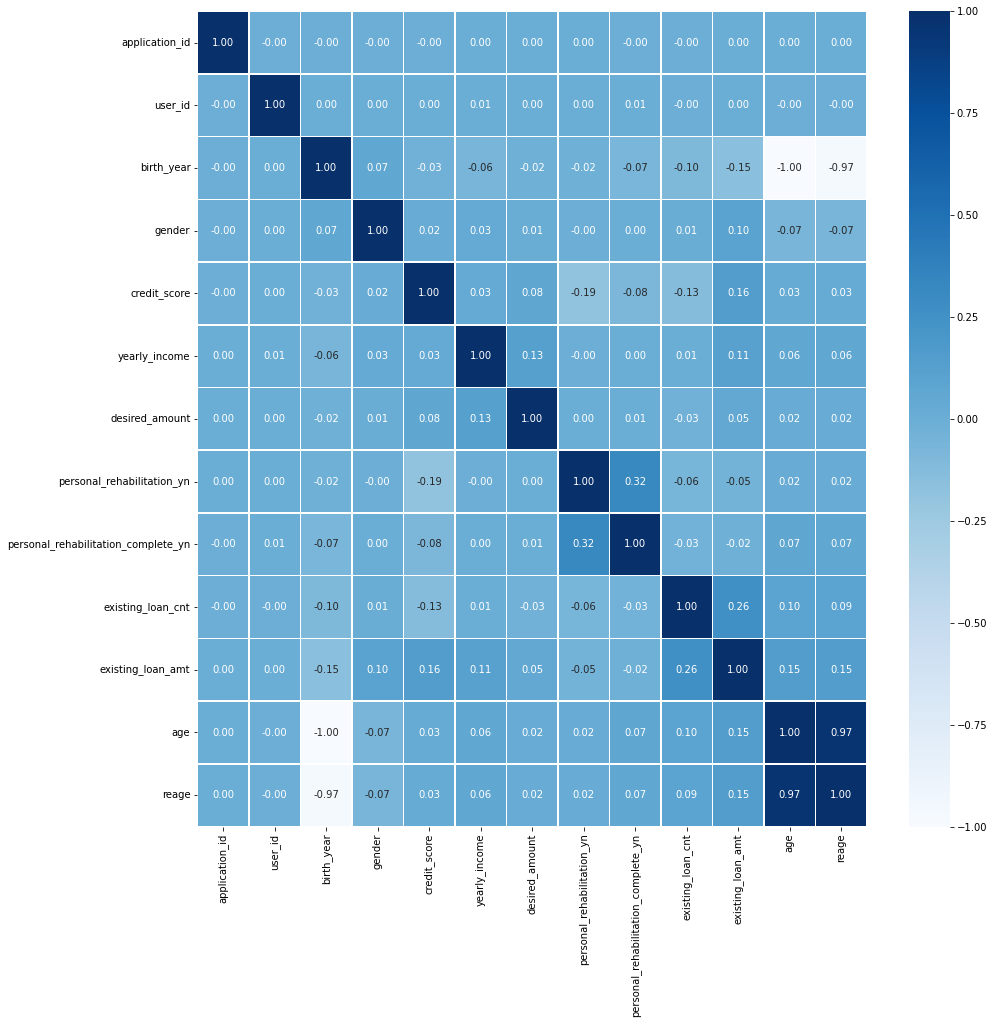

In [61]:
plt.figure(figsize=(15,15))
sns.heatmap(data = user_spec.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

성아님이 말한거 코드로 넣어보기

In [62]:
user_spec['personal_rehabilitation_yn'].isnull().sum()

587376

In [63]:
pry_spec=user_spec[user_spec['personal_rehabilitation_yn'].isnull()]
pry_spec

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
155,1617530,379488,1976.0,1.0,2022-04-20 10:08:40,600.0,100000000.0,PRIVATEBUSINESS,2012.0,정규직,기타가족소유,10000000.0,LIVING,NaN,NaN,1.0,14000000.0,47.0,40.0
159,1232849,575347,1982.0,1.0,2022-04-20 11:49:52,620.0,48000000.0,EARNEDINCOME,2022.0,계약직,전월세,5000000.0,LIVING,NaN,NaN,1.0,NaN,41.0,40.0
160,675491,848534,1984.0,1.0,2022-04-20 15:44:42,580.0,50000000.0,EARNEDINCOME,2020.0,정규직,전월세,50000000.0,LIVING,NaN,NaN,5.0,71000000.0,39.0,30.0
162,867828,126213,1984.0,1.0,2022-04-20 11:07:41,850.0,60000000.0,EARNEDINCOME,2017.0,정규직,전월세,30000000.0,LIVING,NaN,NaN,8.0,138000000.0,39.0,30.0
164,821862,75798,1971.0,0.0,2022-04-20 15:21:23,520.0,65000000.0,EARNEDINCOME2,2016.0,기타,전월세,5000000.0,ETC,NaN,NaN,1.0,28000000.0,52.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394139,889505,564698,1973.0,1.0,2022-03-22 10:04:18,560.0,35000000.0,OTHERINCOME,NaN,기타,기타가족소유,3000000.0,LIVING,NaN,NaN,5.0,13000000.0,50.0,50.0
1394174,1108793,374260,1994.0,1.0,2022-03-22 03:59:57,520.0,20000000.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,SWITCHLOAN,NaN,NaN,0.0,NaN,29.0,20.0
1394194,834323,145747,1958.0,1.0,2022-03-22 18:10:29,760.0,32000000.0,OTHERINCOME,NaN,기타,자가,100000000.0,SWITCHLOAN,NaN,NaN,2.0,31000000.0,65.0,60.0
1394204,1663661,183117,1996.0,0.0,2022-03-22 17:37:49,710.0,30000000.0,OTHERINCOME,NaN,기타,전월세,25000000.0,ETC,NaN,NaN,0.0,NaN,27.0,20.0


위 데이터에서 신용점수 400이하 추출

In [64]:
pry_spec_1=pry_spec[pry_spec['credit_score']<=400]

In [65]:
pry_spec_1

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
392,479935,761774,1970.0,0.0,2022-03-06 20:09:13,100.0,24000000.0,EARNEDINCOME,2020.0,정규직,기타가족소유,20000000.0,SWITCHLOAN,NaN,NaN,2.0,42000000.0,53.0,50.0
399,727366,86953,1958.0,1.0,2022-03-06 15:06:10,100.0,20000000.0,EARNEDINCOME,2020.0,계약직,전월세,10000000.0,HOUSEDEPOSIT,NaN,NaN,1.0,NaN,65.0,60.0
703,305601,619588,1976.0,1.0,2022-03-19 15:53:49,250.0,20000000.0,EARNEDINCOME,2021.0,계약직,전월세,10000000.0,LIVING,NaN,NaN,1.0,15000000.0,47.0,40.0
912,1980548,549237,2000.0,0.0,2022-03-19 17:21:44,250.0,15000000.0,PRIVATEBUSINESS,2021.0,기타,전월세,20000000.0,BUSINESS,NaN,NaN,3.0,4000000.0,23.0,20.0
1025,1463105,169138,1990.0,1.0,2022-03-29 18:36:12,100.0,36000000.0,EARNEDINCOME,2019.0,정규직,기타가족소유,5000000.0,LIVING,NaN,NaN,1.0,36000000.0,33.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389205,373515,744252,1977.0,0.0,2022-03-11 17:01:37,380.0,20000000.0,OTHERINCOME,NaN,기타,자가,5000000.0,LIVING,NaN,NaN,4.0,273000000.0,46.0,40.0
1390002,1241937,666224,1970.0,1.0,2022-03-15 07:03:45,250.0,30000000.0,OTHERINCOME,NaN,기타,전월세,10000000.0,LIVING,NaN,NaN,1.0,NaN,53.0,50.0
1393616,2150800,614132,1951.0,1.0,2022-04-27 17:41:35,250.0,8000000.0,OTHERINCOME,NaN,기타,기타가족소유,30000000.0,INVEST,NaN,NaN,1.0,NaN,72.0,70.0
1394101,236265,859254,1966.0,1.0,2022-03-22 15:50:13,150.0,40000000.0,OTHERINCOME,NaN,기타,전월세,50000000.0,SWITCHLOAN,NaN,NaN,2.0,23000000.0,57.0,50.0


In [66]:
pry_spec['personal_rehabilitation_yn'] = pry_spec_1['personal_rehabilitation_yn'].fillna(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
pry_spec['personal_rehabilitation_yn'].isnull().sum()

577970

나머지 결측값(신용점수가 결측값이라 못 채우는 것도 포함)은 0: 1 = 794046 : 12709 비율로 랜덤 --> 400이하인 것은 1로 만든걸 감안해서 0쪽에 살짝 더 비율을 줘도 될 것 같아 깔끔하게 0:1 = 80:12 로

98.45:1.55 -> 98:2
이비율로 넣을까...? 아님 변수간의 관계를 통해서 넣는 합리적 접근법을 사용할까 하지만 이는 변수간의 관계가 확실하지가 않아서 사용 못할듯...

### 결측치 간의 상관관계를 확인하기

Text(0.5, 1.0, 'Correlation with Missing Values')

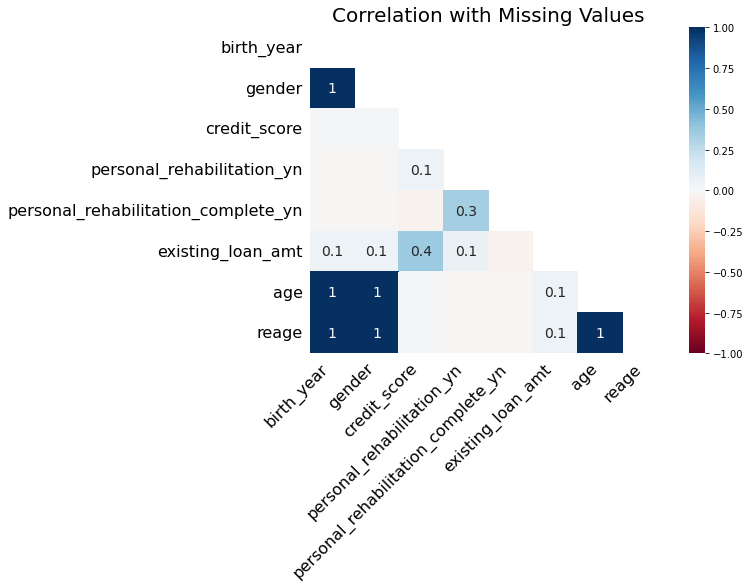

In [67]:
import missingno as msno
user_null = user_spec.columns[user_spec.isnull().any()].tolist()
msno.heatmap(user_spec[user_null], figsize=(8,6))
plt.title("Correlation with Missing Values", fontsize = 20)

결측값간의 관계를 확인해봤지만 아무런 인사이트를 얻을수 없다고 판단... 

- 무작위적으로 샘플링해서 값을 임의로 넣어도 나쁘지 않을것 같다...?

In [69]:
df=user_spec[user_spec['personal_rehabilitation_yn'].isnull()]
df_sample = df.sample(n=569011, random_state=100)
df_sample

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
95015,1616090,287827,1984.0,1.0,2022-03-08 02:38:31,950.0,40000000.0,PRIVATEBUSINESS,2012.0,정규직,자가,20000000.0,BUSINESS,NaN,NaN,4.0,195000000.0,39.0,30.0
899694,1342613,408291,1992.0,1.0,2022-03-14 14:33:34,580.0,33000000.0,EARNEDINCOME,2020.0,정규직,자가,10000000.0,LIVING,NaN,NaN,7.0,94000000.0,31.0,30.0
600545,46690,7355,1979.0,1.0,2022-04-09 22:41:19,680.0,28000000.0,EARNEDINCOME,2018.0,정규직,기타가족소유,10000000.0,LIVING,NaN,NaN,7.0,62000000.0,44.0,40.0
161951,2018855,510129,1970.0,0.0,2022-04-16 22:37:12,700.0,30000000.0,EARNEDINCOME,2021.0,정규직,기타가족소유,35000000.0,SWITCHLOAN,NaN,NaN,6.0,58000000.0,53.0,50.0
128004,1604346,782299,1997.0,1.0,2022-03-07 15:51:54,500.0,60000000.0,FREELANCER,2021.0,기타,기타가족소유,10000000.0,SWITCHLOAN,NaN,NaN,4.0,25000000.0,26.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665861,885219,554018,1989.0,1.0,2022-03-28 11:13:02,640.0,37000000.0,EARNEDINCOME,2019.0,정규직,전월세,1000000.0,LIVING,NaN,NaN,6.0,63000000.0,34.0,30.0
329763,534470,533096,1972.0,1.0,2022-04-24 16:41:35,820.0,80000000.0,EARNEDINCOME,2020.0,정규직,자가,100000000.0,BUSINESS,NaN,NaN,1.0,3000000.0,51.0,50.0
331307,982538,114520,1979.0,0.0,2022-03-24 09:20:02,580.0,36000000.0,EARNEDINCOME,2019.0,정규직,기타가족소유,10000000.0,SWITCHLOAN,NaN,NaN,5.0,76000000.0,44.0,40.0
1036659,59190,356327,1965.0,0.0,2022-03-10 13:39:41,530.0,90000000.0,FREELANCER,2019.0,기타,기타가족소유,30000000.0,SWITCHLOAN,NaN,NaN,2.0,14000000.0,58.0,50.0


In [72]:
pry_spec['personal_rehabilitation_yn'] = df_sample['personal_rehabilitation_yn'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
pry_spec['personal_rehabilitation_yn'].isnull().sum()

18365

In [74]:
pry_spec['personal_rehabilitation_yn'] = pry_spec['personal_rehabilitation_yn'].fillna(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
pry_spec['personal_rehabilitation_yn'].isnull().sum()

0

# 9/20 personal_rehabilitation_complete_yn

1. 개인회생 0 -> 완료 0 으로 되어있는 사람은 오류라 판단해서 N으로 바꾸기

In [64]:
pr_0 = user_spec['personal_rehabilitation_yn'] == 0
prc_0 = user_spec['personal_rehabilitation_complete_yn'] == 0

subset = user_spec[pr_0 & prc_0]
subset

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
153,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,2021.0,기타,전월세,25000000.0,SWITCHLOAN,0.0,0.0,3.0,76000000.0,44.0,40.0
154,1384503,8623,1979.0,0.0,2022-04-20 18:51:40,590.0,50000000.0,PRIVATEBUSINESS,2012.0,정규직,자가,50000000.0,BUSINESS,0.0,0.0,0.0,NaN,44.0,40.0
158,1355252,180240,1995.0,0.0,2022-04-20 15:21:40,930.0,31000000.0,EARNEDINCOME,2022.0,정규직,전월세,50000000.0,BUYHOUSE,0.0,0.0,0.0,NaN,28.0,20.0
172,1806891,866473,1986.0,0.0,2022-04-20 17:09:36,630.0,48000000.0,EARNEDINCOME,2008.0,정규직,기타가족소유,90000000.0,SWITCHLOAN,0.0,0.0,1.0,NaN,37.0,30.0
178,997513,641399,1991.0,0.0,2022-04-20 18:35:07,560.0,25000000.0,EARNEDINCOME,2021.0,정규직,기타가족소유,3000000.0,LIVING,0.0,0.0,0.0,NaN,32.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393605,325289,350747,1988.0,0.0,2022-04-27 16:20:15,NaN,23000000.0,OTHERINCOME,NaN,기타,자가,50000000.0,SWITCHLOAN,0.0,0.0,1.0,236000000.0,35.0,30.0
1393809,2167614,86260,1990.0,0.0,2022-05-21 14:31:55,570.0,60000000.0,OTHERINCOME,NaN,기타,기타가족소유,5000000.0,ETC,0.0,0.0,12.0,23000000.0,33.0,30.0
1393864,447450,152794,1989.0,0.0,2022-05-21 02:27:48,600.0,20000000.0,OTHERINCOME,NaN,기타,전월세,15000000.0,SWITCHLOAN,0.0,0.0,3.0,18000000.0,34.0,30.0
1393898,1762801,792309,2001.0,1.0,2022-06-26 10:56:22,NaN,0.0,OTHERINCOME,NaN,기타,기타가족소유,2000000.0,LIVING,0.0,0.0,0.0,NaN,22.0,20.0


In [65]:
subset['personal_rehabilitation_complete_yn'] =subset['personal_rehabilitation_complete_yn'].replace(0, 'N')
subset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
153,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,2021.0,기타,전월세,25000000.0,SWITCHLOAN,0.0,N,3.0,76000000.0,44.0,40.0
154,1384503,8623,1979.0,0.0,2022-04-20 18:51:40,590.0,50000000.0,PRIVATEBUSINESS,2012.0,정규직,자가,50000000.0,BUSINESS,0.0,N,0.0,NaN,44.0,40.0
158,1355252,180240,1995.0,0.0,2022-04-20 15:21:40,930.0,31000000.0,EARNEDINCOME,2022.0,정규직,전월세,50000000.0,BUYHOUSE,0.0,N,0.0,NaN,28.0,20.0
172,1806891,866473,1986.0,0.0,2022-04-20 17:09:36,630.0,48000000.0,EARNEDINCOME,2008.0,정규직,기타가족소유,90000000.0,SWITCHLOAN,0.0,N,1.0,NaN,37.0,30.0
178,997513,641399,1991.0,0.0,2022-04-20 18:35:07,560.0,25000000.0,EARNEDINCOME,2021.0,정규직,기타가족소유,3000000.0,LIVING,0.0,N,0.0,NaN,32.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393605,325289,350747,1988.0,0.0,2022-04-27 16:20:15,NaN,23000000.0,OTHERINCOME,NaN,기타,자가,50000000.0,SWITCHLOAN,0.0,N,1.0,236000000.0,35.0,30.0
1393809,2167614,86260,1990.0,0.0,2022-05-21 14:31:55,570.0,60000000.0,OTHERINCOME,NaN,기타,기타가족소유,5000000.0,ETC,0.0,N,12.0,23000000.0,33.0,30.0
1393864,447450,152794,1989.0,0.0,2022-05-21 02:27:48,600.0,20000000.0,OTHERINCOME,NaN,기타,전월세,15000000.0,SWITCHLOAN,0.0,N,3.0,18000000.0,34.0,30.0
1393898,1762801,792309,2001.0,1.0,2022-06-26 10:56:22,NaN,0.0,OTHERINCOME,NaN,기타,기타가족소유,2000000.0,LIVING,0.0,N,0.0,NaN,22.0,20.0


In [66]:
pr_1 = user_spec['personal_rehabilitation_yn'] != 0
prc_1 = user_spec['personal_rehabilitation_complete_yn'] != 0

subset1 = user_spec[pr_1 | prc_1]
subset1

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
155,1617530,379488,1976.0,1.0,2022-04-20 10:08:40,600.0,100000000.0,PRIVATEBUSINESS,2012.0,정규직,기타가족소유,10000000.0,LIVING,NaN,NaN,1.0,14000000.0,47.0,40.0
156,1019382,186886,1979.0,1.0,2022-04-20 00:38:18,730.0,95000000.0,EARNEDINCOME,2018.0,정규직,전월세,40000000.0,SWITCHLOAN,0.0,NaN,4.0,142000000.0,44.0,40.0
157,1117343,594274,1993.0,0.0,2022-04-20 15:01:01,670.0,35000000.0,EARNEDINCOME,2019.0,정규직,전월세,13000000.0,SWITCHLOAN,0.0,NaN,3.0,36000000.0,30.0,30.0
159,1232849,575347,1982.0,1.0,2022-04-20 11:49:52,620.0,48000000.0,EARNEDINCOME,2022.0,계약직,전월세,5000000.0,LIVING,NaN,NaN,1.0,NaN,41.0,40.0
160,675491,848534,1984.0,1.0,2022-04-20 15:44:42,580.0,50000000.0,EARNEDINCOME,2020.0,정규직,전월세,50000000.0,LIVING,NaN,NaN,5.0,71000000.0,39.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394139,889505,564698,1973.0,1.0,2022-03-22 10:04:18,560.0,35000000.0,OTHERINCOME,NaN,기타,기타가족소유,3000000.0,LIVING,NaN,NaN,5.0,13000000.0,50.0,50.0
1394174,1108793,374260,1994.0,1.0,2022-03-22 03:59:57,520.0,20000000.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,SWITCHLOAN,NaN,NaN,0.0,NaN,29.0,20.0
1394194,834323,145747,1958.0,1.0,2022-03-22 18:10:29,760.0,32000000.0,OTHERINCOME,NaN,기타,자가,100000000.0,SWITCHLOAN,NaN,NaN,2.0,31000000.0,65.0,60.0
1394204,1663661,183117,1996.0,0.0,2022-03-22 17:37:49,710.0,30000000.0,OTHERINCOME,NaN,기타,전월세,25000000.0,ETC,NaN,NaN,0.0,NaN,27.0,20.0


In [67]:
user_spec = pd.concat([subset, subset1])
user_spec

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
153,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,2021.0,기타,전월세,25000000.0,SWITCHLOAN,0.0,N,3.0,76000000.0,44.0,40.0
154,1384503,8623,1979.0,0.0,2022-04-20 18:51:40,590.0,50000000.0,PRIVATEBUSINESS,2012.0,정규직,자가,50000000.0,BUSINESS,0.0,N,0.0,NaN,44.0,40.0
158,1355252,180240,1995.0,0.0,2022-04-20 15:21:40,930.0,31000000.0,EARNEDINCOME,2022.0,정규직,전월세,50000000.0,BUYHOUSE,0.0,N,0.0,NaN,28.0,20.0
172,1806891,866473,1986.0,0.0,2022-04-20 17:09:36,630.0,48000000.0,EARNEDINCOME,2008.0,정규직,기타가족소유,90000000.0,SWITCHLOAN,0.0,N,1.0,NaN,37.0,30.0
178,997513,641399,1991.0,0.0,2022-04-20 18:35:07,560.0,25000000.0,EARNEDINCOME,2021.0,정규직,기타가족소유,3000000.0,LIVING,0.0,N,0.0,NaN,32.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394139,889505,564698,1973.0,1.0,2022-03-22 10:04:18,560.0,35000000.0,OTHERINCOME,NaN,기타,기타가족소유,3000000.0,LIVING,NaN,NaN,5.0,13000000.0,50.0,50.0
1394174,1108793,374260,1994.0,1.0,2022-03-22 03:59:57,520.0,20000000.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,SWITCHLOAN,NaN,NaN,0.0,NaN,29.0,20.0
1394194,834323,145747,1958.0,1.0,2022-03-22 18:10:29,760.0,32000000.0,OTHERINCOME,NaN,기타,자가,100000000.0,SWITCHLOAN,NaN,NaN,2.0,31000000.0,65.0,60.0
1394204,1663661,183117,1996.0,0.0,2022-03-22 17:37:49,710.0,30000000.0,OTHERINCOME,NaN,기타,전월세,25000000.0,ETC,NaN,NaN,0.0,NaN,27.0,20.0


2. 나머지 결측값 채우기

In [68]:
user_spec.groupby(['personal_rehabilitation_complete_yn']).mean()

,application_id,user_id,birth_year,gender,credit_score,yearly_income,desired_amount,personal_rehabilitation_yn,existing_loan_cnt,existing_loan_amt,age,reage
personal_rehabilitation_complete_yn,,,,,,,,,,,,
0.0,1.092102e+06,442385.101047,1981.547527,0.662166,442.790422,4.083848e+07,3.108248e+07,1.000000,2.174456,3.339738e+07,41.452473,37.075919
1.0,1.071573e+06,459080.598373,1982.290469,0.633888,501.925566,4.036095e+07,3.883358e+07,0.997041,1.877959,3.673455e+07,40.709531,36.248109
N,1.084988e+06,437817.653857,1990.186874,0.609882,641.751217,3.761884e+07,2.681881e+07,0.000000,3.580789,5.969330e+07,32.813126,28.320439


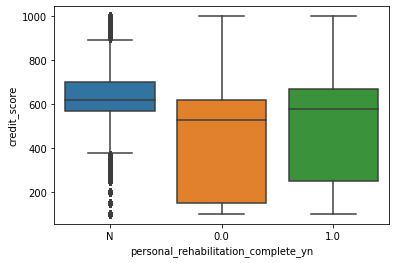

In [69]:
sns.boxplot(y= user_spec["credit_score"], x=user_spec["personal_rehabilitation_complete_yn"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


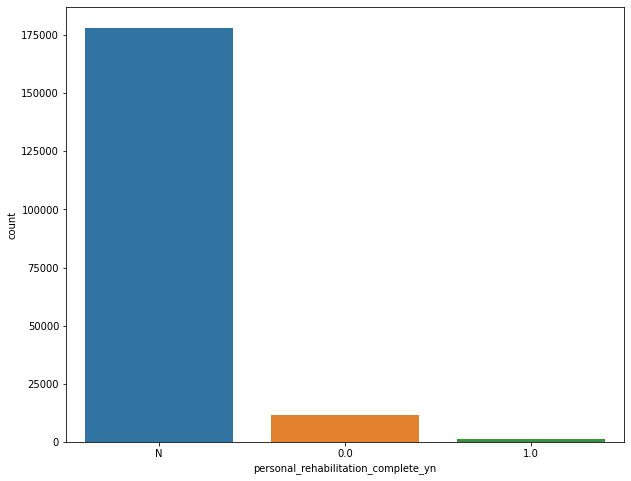

In [70]:
plt.figure(figsize=(10,8))
sns.countplot(user_spec['personal_rehabilitation_complete_yn'])
plt.show()

In [71]:
t = user_spec['personal_rehabilitation_yn'] == 0
tt = user_spec['personal_rehabilitation_complete_yn'] == 1

ttt = user_spec[t & tt]
ttt

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage
94465,1574646,39991,1981.0,0.0,2022-04-21 13:14:59,600.0,22000000.0,EARNEDINCOME,2017.0,계약직,전월세,4000000.0,LIVING,0.0,1.0,1.0,NaN,42.0,40.0
139885,1065260,598997,1988.0,1.0,2022-05-17 19:42:47,NaN,15000000.0,PRIVATEBUSINESS,2017.0,기타,전월세,10000000.0,LIVING,0.0,1.0,0.0,NaN,35.0,30.0
1319216,1624053,24030,1981.0,1.0,2022-05-13 00:23:08,650.0,32000000.0,EARNEDINCOME,2022.0,정규직,기타가족소유,5000000.0,LIVING,0.0,1.0,1.0,3000000.0,42.0,40.0
84244,1501280,855482,2002.0,1.0,2022-06-06 21:01:14,NaN,1000000.0,OTHERINCOME,NaN,기타,기타가족소유,0.0,LIVING,0.0,1.0,0.0,NaN,21.0,20.0


* 개인회생자가 아닌데 개인회생납입 완료인 사람은 과거에 납입 완료해서 현재는 개인회생자가 아닌걸로 뵈야하나

* 개인회생자가 0인 사람은 개인회생납부 중인거는 말이 안되고, 개인회생납부 완료자는 4명밖에 없고 거의 대부분이 N 이므로 개인회생납부완료의 결측값은 N으로 채우기
* 개인회생자가 1인 사람은 신용점수 600이상은 1, 나머지는 0으로 채우기